# Customer Service Request Analysis.

## Introduction
        NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

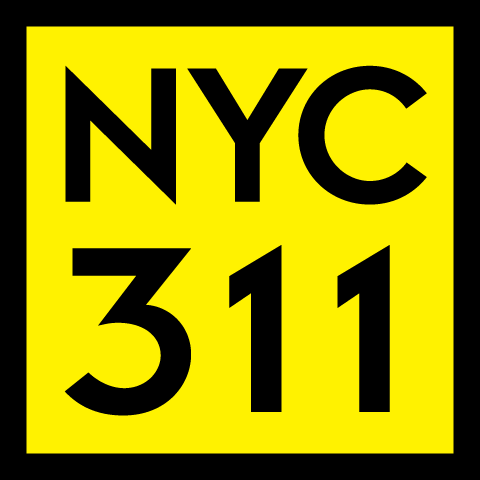

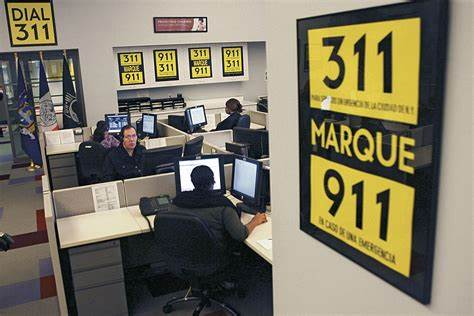

    311 service is generally implemented at the local level that is in some cities, it is also used for various municipal calls.
**Examples of calls intended for 3-1-1 include:**
- abandoned vehicles in roadway
- code and housing violations
- dead animal removal
- debris in roadway
- graffiti removal
- illegal burning
- non-working streetlamps, parking meters, traffic lights
- noise complaints
- Parking Law Enforcement
- Parks and recreation concerns
- potholes, sinkholes and utility holes in streets
- public safety concerns
- rat or rodent infestation
- reporting stolen vehicles

## Problem Objective :
Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.

###  **Domain**:  <u> *Customer Service* </u>
Below is the list of features and their descriptions for the dataset. There are a total of 52 features in this dataset

In [18]:
field = ['Unique Key','Created Date','Closed Date','Agency','Agency Name','Complaint Type','Descriptor','Location Type',
        'Incident Zip','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
         'Intersection Street 2','Address Type','City','Landmark','Facility Type','Status','Due Date',
         'Resolution Action Updated Date','Community Board','Borough','X Coordinate','Y Coordinate','Park Facility Name',
        'Park Borough','School Name','School Number','School Region','School Code','School Phone Number','School Address',
        'School City','School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type',
         'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp',
         'Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Latitude','Longitude',
         'Location']


description = ['Unique identifier for the complaints','The date and time on which the complaint is raised',
               'The date and time on which the complaint is closed','Agency code','Name of the agency','Type of complaint',
               'Complaint type label (Heating - Heat, Traffic Signal Condition - Controller)',
               'Type of location (Residential, Restaurant, Bakery, etc)','Zip code for location','Address of location',
               'Name of the street','Detail of cross street','Detail of 2nd cross street','Detail of intersection street',
              'Detail of 2nd intersection street','Categorical (Address or Intersection)','City for location',
               'Empty field','N/A','Categorical (Closed or Pending)','Date and time for the pending complaints',
              'Date and time when the resolution was provided','Categorical field(specifies community board with code)',
              'Categorical field (specifies the community board)','(Number)','(Number)','Unspecified',
               'Categorical (Unspecified, Queens, Brooklyn etc)','Unspecified','Unspecified','Unspecified','Unspecified',
               'Unspecified','Unspecified','Unspecified','Unspecified','Unspecified','Empty Field','Empty Field','Empty Field',
               'Empty Field','Empty Field','Empty Field','Empty Field','Empty Field','Empty Field','Empty Field','Empty Field',
               'Empty Field','Latitude of the location','Longitude of the location','Coordinates:(latitude,longitude)']
info = pd.DataFrame({'Feature':field,'Description':description})
info

,Feature,Description
0,Unique Key,Unique identifier for the complaints
1,Created Date,The date and time on which the complaint is ra...
2,Closed Date,The date and time on which the complaint is cl...
3,Agency,Agency code
4,Agency Name,Name of the agency
5,Complaint Type,Type of complaint
6,Descriptor,"Complaint type label (Heating - Heat, Traffic ..."
7,Location Type,"Type of location (Residential, Restaurant, Bak..."
8,Incident Zip,Zip code for location
9,Incident Address,Address of location


## Preliminary ASSIGN-ment!!!!! 😂😂
Hahahah yes, thats right!!! Now that we have an intro, lets get on with loading the libraries and dataset and assigning them to the variables.

In [1]:
#Load the essential libraries
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline

In [2]:
import folium

In [3]:
#Load the dataset
nyc = pd.read_csv('C:/Users/ruben/OneDrive/Documents/Python_DS/Datasets/311_Service_Requests_from_2010_to_Present.csv')
nyc.head()

C:\Users\ruben\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


## Exploratory Data Analysis (EDA)
Now that the dataset and libraries are loaded, lets inspect the data and analyse if there are any patterns in the data, searching for outliers, missing values, with the help of descriptive statistics and data visualization techniques.Lets have a look at the data

In [4]:
nyc.head(50)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
5,32306554,12/31/2015 11:56:30 PM,01-01-16 1:50,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
6,32306559,12/31/2015 11:55:32 PM,01-01-16 1:53,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,524 WEST 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)"
7,32307009,12/31/2015 11:54:05 PM,01-01-16 1:42,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10457.0,501 EAST 171 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837503,-73.902905,"(40.83750262540012, -73.90290517326568)"
8,32308581,12/31/2015 11:53:58 PM,01-01-16 8:27,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415.0,83-44 LEFFERTS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.704977,-73.832605,"(40.704977164399935, -73.8326047502584)"
9,32308391,12/31/2015 11:53:58 PM,01-01-16 1:17,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"


Now lets analyse and check how the dataset is  structurely

In [5]:
nyc.info()  #structure of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [6]:
nyc.isna().sum()  #Checking the number of missing valuesfor each column

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [7]:
nyc.isna().sum() == nyc.shape[0]  

Unique Key                        False
Created Date                      False
Closed Date                       False
Agency                            False
Agency Name                       False
Complaint Type                    False
Descriptor                        False
Location Type                     False
Incident Zip                      False
Incident Address                  False
Street Name                       False
Cross Street 1                    False
Cross Street 2                    False
Intersection Street 1             False
Intersection Street 2             False
Address Type                      False
City                              False
Landmark                          False
Facility Type                     False
Status                            False
Due Date                          False
Resolution Description            False
Resolution Action Updated Date    False
Community Board                   False
Borough                           False


<AxesSubplot:>

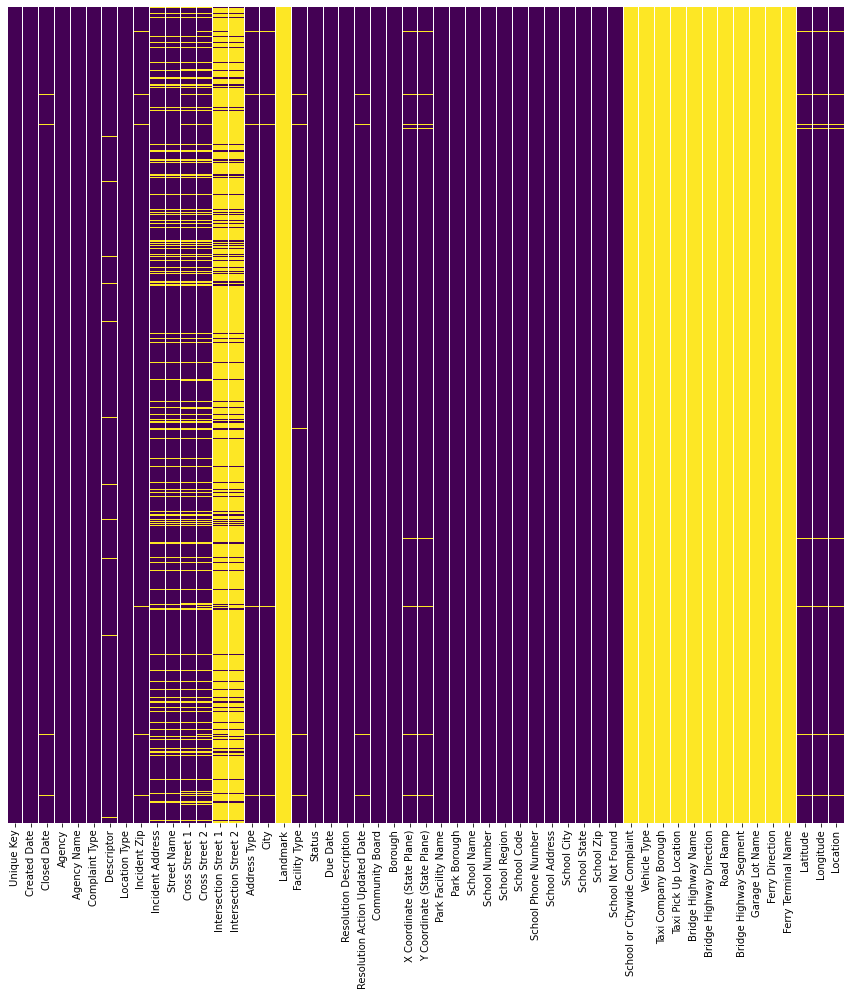

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(nyc.isnull(), yticklabels=False,\
            cbar=False,cmap='viridis')

It can be seen that there is so many missing values for intersection street names.This makes sense as the caller won't usually have the time to figure out the name of the intersecting streets. However, there are no logs on school or college complaints,vehicle type, and any taxi oriented details and garage lot. Hence we drop these columns as they are of no value to our analysis.

In [9]:
nyc.dropna(axis = 1,how = 'all',inplace = True)  #Drop the columns with all null values

In [10]:
nyc[(nyc['Closed Date'].isnull()) & (nyc['Status']!='Closed')][['Created Date','Closed Date','Status']]

,Created Date,Closed Date,Status
416,12/31/2015 02:16:04 PM,NaN,Open
611,12/31/2015 09:58:06 AM,NaN,Open
1648,12/30/2015 05:13:42 AM,NaN,Open
1816,12/29/2015 10:44:50 PM,NaN,Open
1965,12/29/2015 07:09:13 PM,NaN,Open
...,...,...,...
300273,03/29/2015 02:40:19 PM,NaN,Open
300492,03/29/2015 08:50:15 AM,NaN,Open
300496,03/29/2015 08:44:13 AM,NaN,Open
300620,03/29/2015 01:55:35 AM,NaN,Open


From the data, we can see that in the closed date column there are 2164 missing values.This is because these logs havent been resolved yet. Lets convert the columns to date time format or date time type.

In [11]:
nyc['Created Date'] = pd.to_datetime(nyc['Created Date'])

In [17]:
nyc[nyc['Status']=='Closed'][['Created Date','Closed Date','Status']]

,Created Date,Closed Date,Status
0,2015-12-31 23:59:45,2016-01-01 00:55:00,Closed
1,2015-12-31 23:59:44,2016-01-01 01:26:00,Closed
2,2015-12-31 23:59:29,2016-01-01 04:51:00,Closed
3,2015-12-31 23:57:46,2016-01-01 07:43:00,Closed
4,2015-12-31 23:56:58,2016-01-01 03:24:00,Closed
...,...,...,...
300692,2015-03-29 00:34:32,2015-03-29 01:13:01,Closed
300694,2015-03-29 00:33:28,2015-03-29 02:33:59,Closed
300695,2015-03-29 00:33:03,2015-03-29 03:40:20,Closed
300696,2015-03-29 00:33:02,2015-03-29 04:38:35,Closed


In [13]:
#Converting a string of multiple date fpormats to a single format 
#nyc['Closed Date'] = nyc['Closed Date'].dt.strftime('%Y-%m-%d %H:%M')

AttributeError: Can only use .dt accessor with datetimelike values

In [14]:
#converting to a datetype
nyc['Closed Date'] = pd.to_datetime(nyc['Closed Date'])

In [18]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 48 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      300698 non-null  int64         
 1   Created Date                    300698 non-null  datetime64[ns]
 2   Closed Date                     298534 non-null  datetime64[ns]
 3   Agency                          300698 non-null  object        
 4   Agency Name                     300698 non-null  object        
 5   Complaint Type                  300698 non-null  object        
 6   Descriptor                      294784 non-null  object        
 7   Location Type                   300567 non-null  object        
 8   Incident Zip                    298083 non-null  float64       
 9   Incident Address                256288 non-null  object        
 10  Street Name                     256288 non-null  object 

In [19]:
req_clos = nyc['Closed Date'] - nyc['Created Date']
nyc.insert(3,'Request_Closing_Time',req_clos)

A new column is created by the name ‘Request_Closing_Time’ which is the time elapsed between request creation and request closing. 

In [20]:
nyc.head()

,Unique Key,Created Date,Closed Date,Request_Closing_Time,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,0 days 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,0 days 01:26:16,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,0 days 04:51:31,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,0 days 07:45:14,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,0 days 03:27:02,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [21]:
nyc['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [22]:
nyc['Status'].value_counts()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

In [23]:
nyc.describe()

,Unique Key,Request_Closing_Time,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
count,3.006980e+05,298534,298083.000000,2.971580e+05,297158.000000,297158.000000,297158.000000
mean,3.130054e+07,0 days 04:18:51.832782865,10848.888645,1.004854e+06,203754.534416,40.725885,-73.925630
std,5.738547e+05,0 days 06:05:22.141833856,583.182081,2.175338e+04,29880.183529,0.082012,0.078454
min,3.027948e+07,0 days 00:01:00,83.000000,9.133570e+05,121219.000000,40.499135,-74.254937
25%,3.080118e+07,0 days 01:16:33,10310.000000,9.919752e+05,183343.000000,40.669796,-73.972142
50%,3.130436e+07,0 days 02:42:55.500000,11208.000000,1.003158e+06,201110.500000,40.718661,-73.931781
75%,3.178446e+07,0 days 05:21:00,11238.000000,1.018372e+06,224125.250000,40.781840,-73.876805
max,3.231065e+07,24 days 16:52:22,11697.000000,1.067173e+06,271876.000000,40.912869,-73.700760


In [24]:
df_location = nyc[['Status','Latitude','Longitude']]

In [25]:
df_location.head()

,Status,Latitude,Longitude
0,Closed,40.865682,-73.923501
1,Closed,40.775945,-73.915094
2,Closed,40.870325,-73.888525
3,Closed,40.835994,-73.828379
4,Closed,40.733060,-73.874170


In [26]:
df_location['Time Elapsed'] = nyc['Request_Closing_Time']

<ipython-input-26-b15158dc9a47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_location['Time Elapsed'] = nyc['Request_Closing_Time']


In [27]:
df_location.shape[0]

300698

In [28]:
#If you want to drop missing values from any specific column, slice the original dataset into a new datframe 
df_location.dropna(how = 'any',inplace = True)

<ipython-input-28-d3567308df43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_location.dropna(how = 'any',inplace = True)


In [29]:
df_location.shape[0]

297102

In [30]:
df_location['Latitude'].apply(dropnull)

NameError: name 'dropnull' is not defined

In [31]:
df_location[df_location['Latitude'].isnull()]

,Status,Latitude,Longitude,Time Elapsed


In [32]:
df_location.index = np.arange(0,df_location.shape[0])
df_location.head(50)

,Status,Latitude,Longitude,Time Elapsed
0,Closed,40.865682,-73.923501,0 days 00:55:15
1,Closed,40.775945,-73.915094,0 days 01:26:16
2,Closed,40.870325,-73.888525,0 days 04:51:31
3,Closed,40.835994,-73.828379,0 days 07:45:14
4,Closed,40.733060,-73.874170,0 days 03:27:02
5,Closed,40.660823,-73.992568,0 days 01:53:30
6,Closed,40.840848,-73.937375,0 days 01:57:28
7,Closed,40.837503,-73.902905,0 days 01:47:55
8,Closed,40.704977,-73.832605,0 days 08:33:02
9,Closed,40.623793,-73.999539,0 days 01:23:02


In [33]:
colors = {'Closed':'green','Open':'red','Assigned':'beige','Draft':'gray'}
from folium import plugins

In [35]:
lat = 40.725885
long = -73.925630  #Mean values of latitude and longitude
nyc_cluster=folium.Map(location=[lat,long],zoom_start=8)
cluster=plugins.MarkerCluster().add_to(nyc_cluster)
nyc_Marker=folium.Map(location=[lat,long],zoom_start=12)
for lat,lng,num in zip(df_location['Latitude'],df_location['Longitude'],range(1,df_location.shape[0])): 
         popup = folium.Popup(df_location['Status'][num],parse_html=True)
         folium.Marker(
                    [lat,lng],
                    popup=popup,
                 icon=folium.Icon(color=colors[df_location.iloc[num,0]])
            ).add_to(cluster)
nyc_cluster

KeyboardInterrupt: 

In [36]:
nyc[nyc['Location'].isnull()]

,Unique Key,Created Date,Closed Date,Request_Closing_Time,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
33,32306700,2015-12-31 23:18:10,2016-01-02 01:04:00,1 days 01:45:50,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,32309451,2015-12-31 17:40:16,2016-01-01 10:59:00,0 days 17:18:44,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,32309860,2015-12-31 17:05:30,2016-01-01 08:17:00,0 days 15:11:30,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,32305700,2015-12-31 14:16:04,NaT,NaT,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434,32306605,2015-12-31 13:51:35,2015-12-31 14:32:56,0 days 00:41:21,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11377.0,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300273,30287350,2015-03-29 14:40:19,NaT,NaT,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300492,30284963,2015-03-29 08:50:15,NaT,NaT,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300496,30285492,2015-03-29 08:44:13,NaT,NaT,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300620,30282717,2015-03-29 01:55:35,NaT,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
nyc[nyc['Location'].isnull()]['Complaint Type'].value_counts()

Illegal Parking              1295
Noise - Street/Sidewalk       819
Noise - Commercial            401
Blocked Driveway              321
Noise - Vehicle               210
Derelict Vehicle              199
Noise - Park                  113
Homeless Encampment            49
Animal Abuse                   31
Vending                        26
Traffic                        23
Bike/Roller/Skate Chronic      13
Noise - House of Worship        9
Drinking                        9
Panhandling                     6
Agency Issues                   6
Illegal Fireworks               5
Ferry Complaint                 2
Animal in a Park                1
Disorderly Youth                1
Posting Advertisement           1
Name: Complaint Type, dtype: int64

In [38]:
nyc[nyc['Location'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3540 entries, 33 to 300693
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   Unique Key                      3540 non-null   int64          
 1   Created Date                    3540 non-null   datetime64[ns] 
 2   Closed Date                     1432 non-null   datetime64[ns] 
 3   Request_Closing_Time            1432 non-null   timedelta64[ns]
 4   Agency                          3540 non-null   object         
 5   Agency Name                     3540 non-null   object         
 6   Complaint Type                  3540 non-null   object         
 7   Descriptor                      3467 non-null   object         
 8   Location Type                   3531 non-null   object         
 9   Incident Zip                    966 non-null    float64        
 10  Incident Address                3531 non-null   object   

It can be seen that the location longitude latitude and the (X,Y) values have the same records which have missing values. Hence we can assume that those data doesnt have any geographical info 

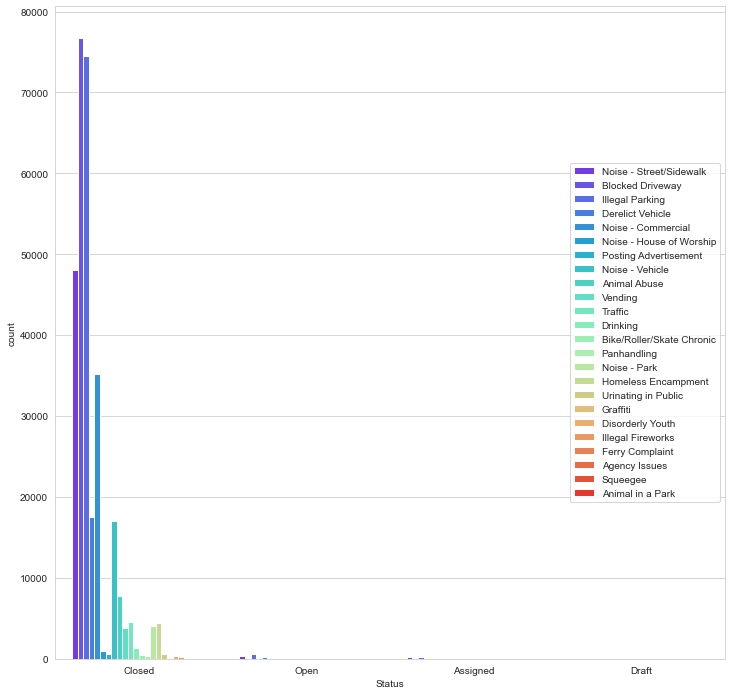

In [39]:
plt.figure(figsize = (12,12),)
sns.set_style('whitegrid')
sns.countplot(x='Status',hue='Complaint Type',data=nyc, palette='rainbow')
plt.legend(loc='right')
plt.show()

No. of closed cases:  298471


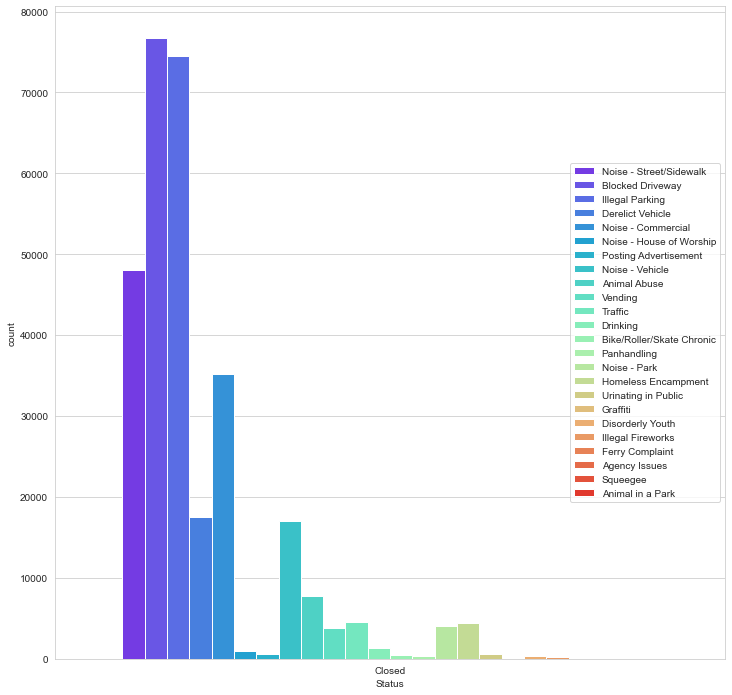

In [40]:
print("No. of closed cases: ",nyc[nyc['Status']=='Closed'].shape[0])
plt.figure(figsize = (12,12),)
sns.set_style('whitegrid')
sns.countplot(x=nyc[nyc['Status']=='Closed']['Status'],hue='Complaint Type',data=nyc, palette='rainbow')
plt.legend(loc='right')
plt.show()

We can see that majority of the cases are resolved by the NYC311 services by a total of 298471 closed cases.Now lets see the remaining sections and see which are yet to be resolved.

In [41]:
nyc.shape[0] - nyc[nyc['Status']=='Closed'].shape[0]

2227

No. of open cases:  1439


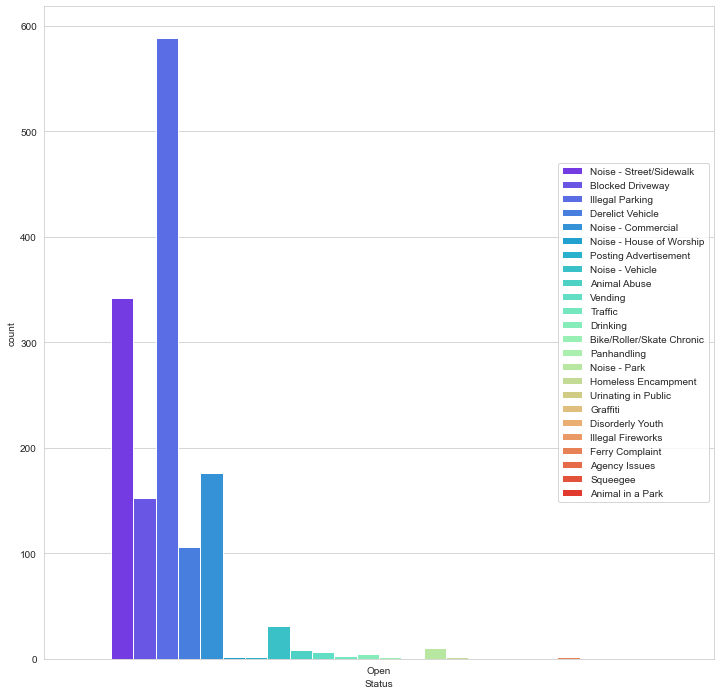

In [42]:
print("No. of open cases: ",nyc[nyc['Status']=='Open'].shape[0])
plt.figure(figsize = (12,12),)
sns.set_style('whitegrid')
sns.countplot(x=nyc[nyc['Status']=='Open']['Status'],hue='Complaint Type',data=nyc, palette='rainbow')
plt.legend(loc='right')
plt.show()

No. of assigned cases:  786


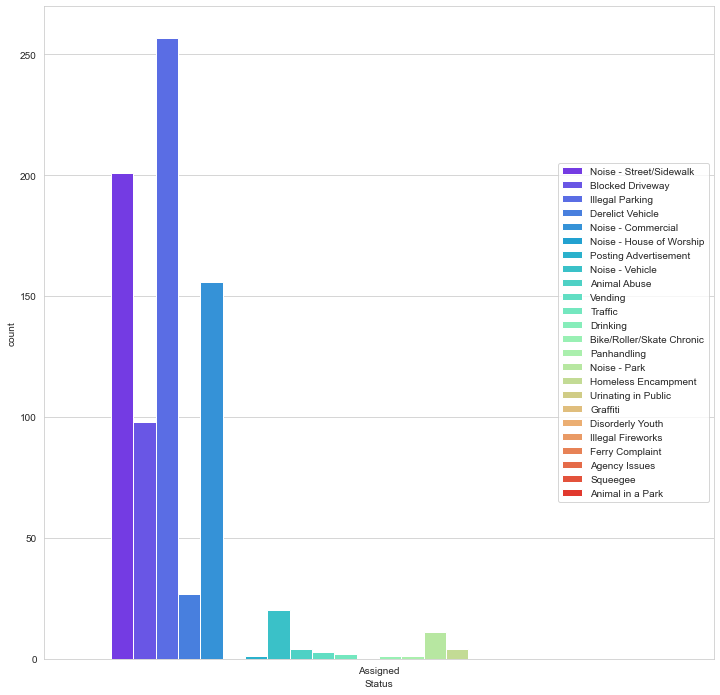

In [43]:
print("No. of assigned cases: ",nyc[nyc['Status']=='Assigned'].shape[0])
plt.figure(figsize = (12,12),)
sns.set_style('whitegrid')
sns.countplot(x=nyc[nyc['Status']=='Assigned']['Status'],hue='Complaint Type',data=nyc, palette='rainbow')
plt.legend(loc='right')
plt.show()

No. of drafted cases:  2


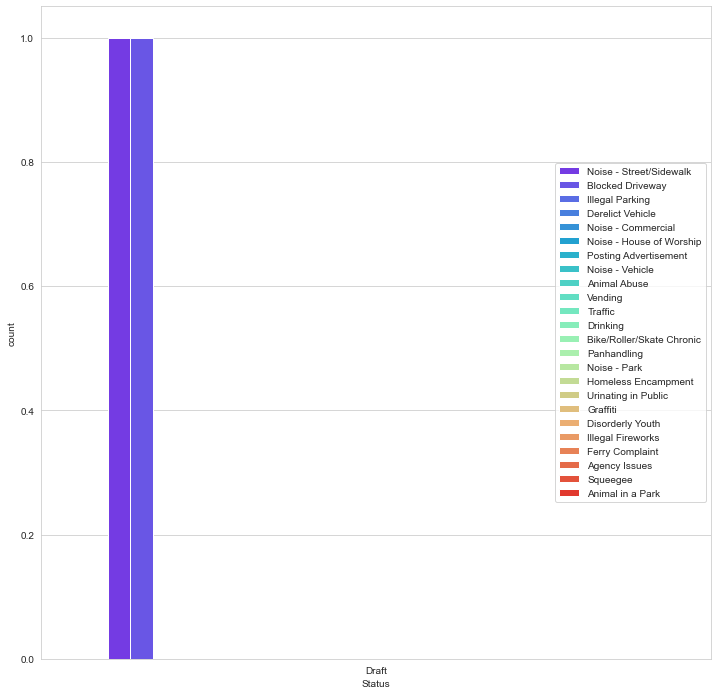

In [44]:
print("No. of drafted cases: ",nyc[nyc['Status']=='Draft'].shape[0])
plt.figure(figsize = (12,12),)
sns.set_style('whitegrid')
sns.countplot(x=nyc[nyc['Status']=='Draft']['Status'],hue='Complaint Type',data=nyc, palette='rainbow')
plt.legend(loc='right')
plt.show()

As you can see, out of the 2227 cases, 1439 cases are still not processesed yet for delivering to the required agency,786 cases are assigned to the agencies and two are drafted cases or in progress of clearing the complaint.

In [49]:
nyc['Agency'].value_counts()

NYPD    300698
Name: Agency, dtype: int64

It can be noticed that all the cases are registered to onlhy one Agency name as the NYPD.This is because only the policew are in charge of ensuring law and order are maintained throughout the city. It is advisable to bring in more services such as animal control, 

In [50]:
nyc[nyc['Complaint Type'] == 'Squeegee']

,Unique Key,Created Date,Closed Date,Request_Closing_Time,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
189095,31044728,2015-07-10 08:11:00,2015-07-10 14:18:00,0 days 06:07:00,NYPD,New York City Police Department,Squeegee,NaN,Street/Sidewalk,10036.0,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.759730,-73.991683,"(40.75973017419921, -73.99168328325673)"
215478,30871215,2015-06-17 16:59:07,2015-06-17 23:46:19,0 days 06:47:12,NYPD,New York City Police Department,Squeegee,NaN,Street/Sidewalk,10016.0,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.746392,-73.977635,"(40.746391579995645, -73.97763525380114)"
282636,30427320,2015-04-18 19:31:31,2015-04-18 20:42:16,0 days 01:10:45,NYPD,New York City Police Department,Squeegee,NaN,Street/Sidewalk,10018.0,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.758978,-73.993936,"(40.75897825494627, -73.99393579583666)"
297697,30314122,2015-04-01 18:12:00,2015-04-01 20:18:00,0 days 02:06:00,NYPD,New York City Police Department,Squeegee,NaN,Street/Sidewalk,10016.0,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.748302,-73.978338,"(40.748302059547854, -73.97833838049131)"


Complaints such as 'Squeegee' can be given to a maintenance agency so that complaints with more priority focus can be attained.

In [52]:
nyc['Agency Name'].unique()

array(['New York City Police Department', 'NYPD',
       'Internal Affairs Bureau'], dtype=object)

In [51]:
nyc[nyc['Complaint Type']=='Agency Issues']

,Unique Key,Created Date,Closed Date,Request_Closing_Time,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
186023,31059332,2015-07-12 17:01:00,2015-07-13 00:33:00,0 days 07:32:00,NYPD,Internal Affairs Bureau,Agency Issues,Language Access Complaint,NaN,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187856,31052613,2015-07-11 06:20:00,2015-07-11 16:43:00,0 days 10:23:00,NYPD,Internal Affairs Bureau,Agency Issues,Language Access Complaint,NaN,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207251,30928156,2015-06-24 13:38:01,2015-06-24 16:20:17,0 days 02:42:16,NYPD,Internal Affairs Bureau,Agency Issues,Language Access Complaint,NaN,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239986,30709273,2015-05-27 16:39:39,2015-05-27 23:31:05,0 days 06:51:26,NYPD,Internal Affairs Bureau,Agency Issues,Language Access Complaint,NaN,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246205,30675430,2015-05-22 14:54:06,2015-05-22 16:01:59,0 days 01:07:53,NYPD,Internal Affairs Bureau,Agency Issues,Language Access Complaint,NaN,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279079,30460208,2015-04-22 09:33:01,2015-04-22 12:30:09,0 days 02:57:08,NYPD,Internal Affairs Bureau,Agency Issues,Language Access Complaint,NaN,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
nyc[nyc['Agency Name']=='Internal Affairs Bureau']

,Unique Key,Created Date,Closed Date,Request_Closing_Time,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
186023,31059332,2015-07-12 17:01:00,2015-07-13 00:33:00,0 days 07:32:00,NYPD,Internal Affairs Bureau,Agency Issues,Language Access Complaint,NaN,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187856,31052613,2015-07-11 06:20:00,2015-07-11 16:43:00,0 days 10:23:00,NYPD,Internal Affairs Bureau,Agency Issues,Language Access Complaint,NaN,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207251,30928156,2015-06-24 13:38:01,2015-06-24 16:20:17,0 days 02:42:16,NYPD,Internal Affairs Bureau,Agency Issues,Language Access Complaint,NaN,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239986,30709273,2015-05-27 16:39:39,2015-05-27 23:31:05,0 days 06:51:26,NYPD,Internal Affairs Bureau,Agency Issues,Language Access Complaint,NaN,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246205,30675430,2015-05-22 14:54:06,2015-05-22 16:01:59,0 days 01:07:53,NYPD,Internal Affairs Bureau,Agency Issues,Language Access Complaint,NaN,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279079,30460208,2015-04-22 09:33:01,2015-04-22 12:30:09,0 days 02:57:08,NYPD,Internal Affairs Bureau,Agency Issues,Language Access Complaint,NaN,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
nyc[nyc['Agency Name']=='New York City Police Department']['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Squeegee', 'Animal in a Park'], dtype=object)

In [91]:
nyc[nyc['Agency Name']=='NYPD']

,Unique Key,Created Date,Closed Date,Request_Closing_Time,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Agency_Names
24069,32148359,2015-12-07 10:02:00,NaT,NaT,NYPD,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York City Police Department
175921,31129107,2015-07-21 16:05:39,2015-07-21 21:56:38,0 days 05:50:59,NYPD,NYPD,Blocked Driveway,No Access,NaN,11219.0,...,NaN,NaN,NaN,NaN,NaN,NaN,40.625772,-73.999564,"(40.625772059824854, -73.999564104631)",New York City Police Department


In [60]:
nyc[nyc['Agency Name']=='NYPD']['Complaint Type'].unique()

array(['Illegal Parking', 'Blocked Driveway'], dtype=object)

Since the complaints of both nypd and new york police dept are the same, we can change the labels to one level

In [88]:
#Function to make nypd and new york police department as one
def nypd(col):
    if col == 'NYPD':
        return 'New York City Police Department'
    else:
        return col

In [93]:
nyc['Agency Name'] = nyc['Agency Name'].apply(nypd)

In [94]:
nyc['Agency Name'].unique()

array(['New York City Police Department', 'Internal Affairs Bureau'],
      dtype=object)

We can concur that the while the New York City Police department takes care of maintaining law and order, the Internal Affairs Bureau deals with issues related to the agency itself such as abusive behaviour by the cops, ensuring no corruption takes place within the dept.   

In [4]:
nyc['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [ ]:
nyc